In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from timeit import default_timer as timer
from utils import polynomial, plot_polynomial, polynomial_data, plot_linear, NUM_DIMENSIONS

# Part 1: A new dataset

## Let's generate some data to try to fit

In [26]:
np.random.seed(3)
# 1 + 0.5 * x - 0.5 x^2 - 0.2 x^3 - 0.1 x^4
coeffs = [1, 0.5, -0.5, -0.2, -0.1]
x, y = polynomial_data(coeffs, 200)

## Let's inspect it

In [27]:
# Good to look at shapes, some values
print(x.shape)
print(y.shape)
print(x[:5])
print(y[:5])

(200, 1)
(200, 1)
[[ 0.10159581]
 [ 0.41629565]
 [-0.41819052]
 [ 0.02165521]
 [ 0.78589391]]
[[0.9658252 ]
 [1.111339  ]
 [0.68890753]
 [0.88078641]
 [1.21651879]]


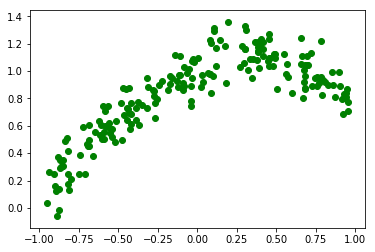

In [28]:
plt.scatter(x, y, color='green')

# Part 2: Ordinary least squares

## Let's code up a naive solution to least squares here

In [29]:
def least_squares(x, y):
    # TODO: Define least squares solution here!
    xTx = x.T.dot(x)
    xTx_inv = np.linalg.inv(xTx)
    w = xTx_inv.dot(x.T.dot(y))
    
    y_hat = x.dot(w)
    error = np.mean((y - y_hat) ** 2)
    return w, error

## How well does it work?

In [30]:
linear_coeff, err = least_squares(x, y)

0.7256854071479403


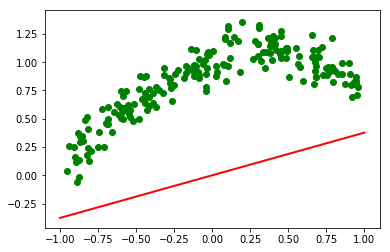

In [31]:
plt.scatter(x, y, color='green')
plot_linear(linear_coeff)
print(err)

# Part 3: Polynomial features

In [8]:
def polynomial_features(x, order):
    # TODO: Calculate polynomial features
    features = np.column_stack([x**i for i in range(0, order+1)])
    return features

In [10]:
def plot_regression(x, y, order):
    start = timer()
    features = polynomial_features(x, order)
    w, mse = least_squares(features, y)
    end = timer()
    plt.scatter(x, y, color='green')
    plot_polynomial(w)
    plt.title(f"Polynomial degree: {order}, error: {mse}, time: {end-start}")

## How well does it work in other dimensions?

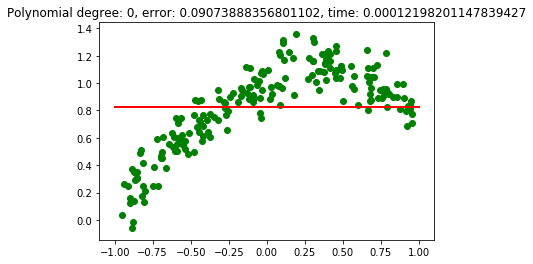

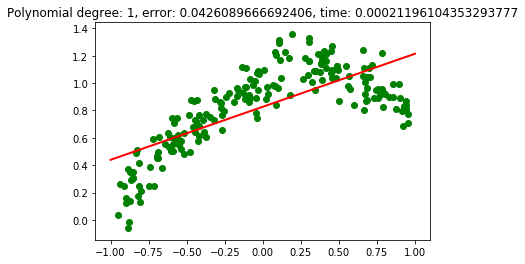

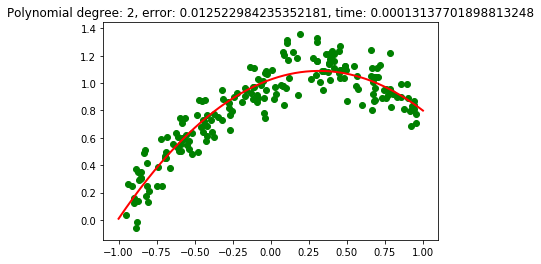

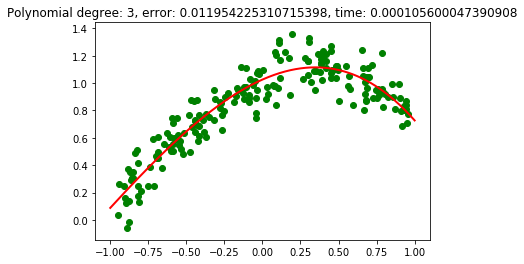

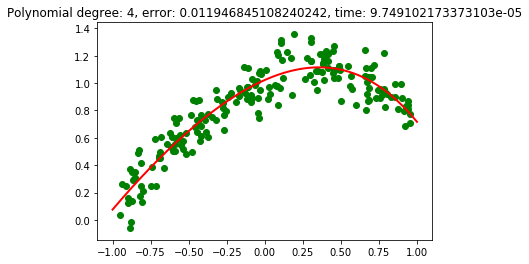

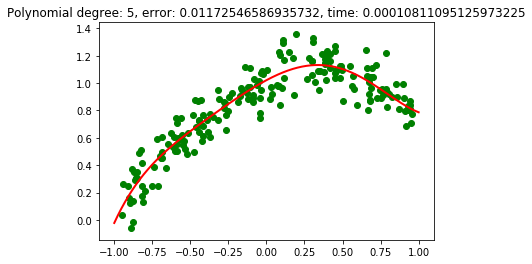

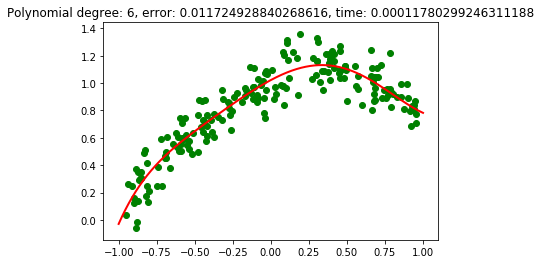

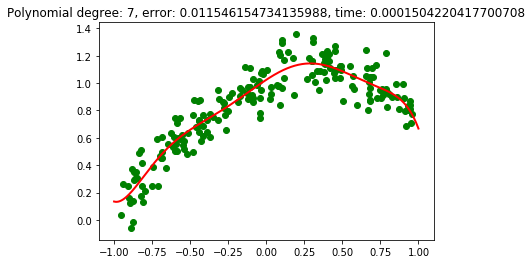

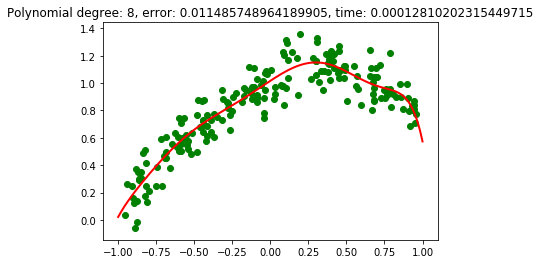

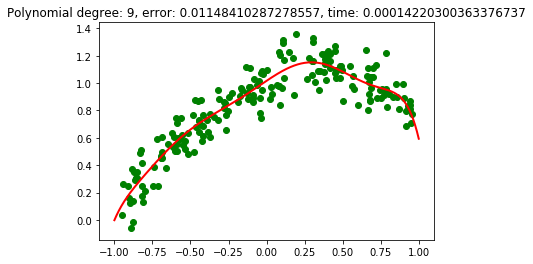

In [11]:
times = []
errs = []
for i in range(0, 10):
    plt.figure()
    plot_regression(x, y, i)

## Maybe we can do better

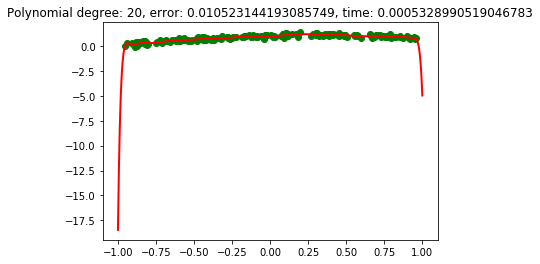

In [12]:
plot_regression(x, y, 20)

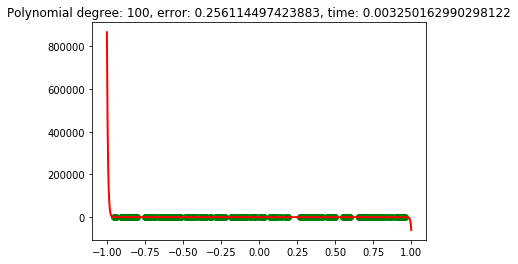

In [13]:
plot_regression(x, y, 100)

In [14]:
features_100 = polynomial_features(x, 100)

In [15]:
features_100.shape

(200, 101)

In [16]:
xTx = features_100.T.dot(features_100)

In [18]:
eig, _ = np.linalg.eig(xTx)

In [19]:
eig.min()

(-2.0359591529775498e-15+0j)

## What happens if we sample new data?

In [20]:
np.random.seed(124)
x_new, y_new = polynomial_data(coeffs, 200)

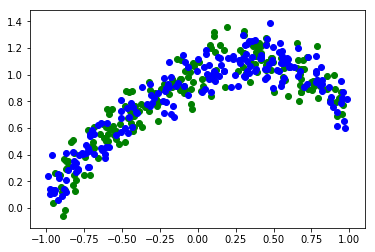

In [21]:
plt.scatter(x, y, color='green')
plt.scatter(x_new, y_new, color='blue')

### 4-degree polynomial

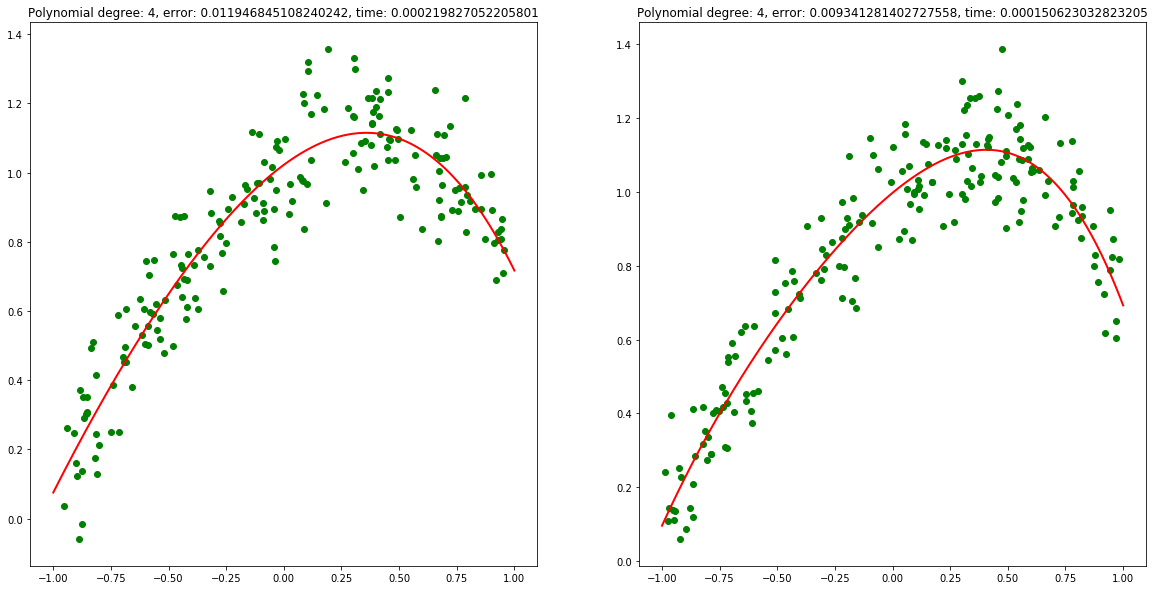

In [22]:
plt.figure(figsize=(20, 10))
plt.subplot(121)
plot_regression(x, y, 4)
plt.subplot(122)
plot_regression(x_new, y_new, 4)

### 20-degree polynomial

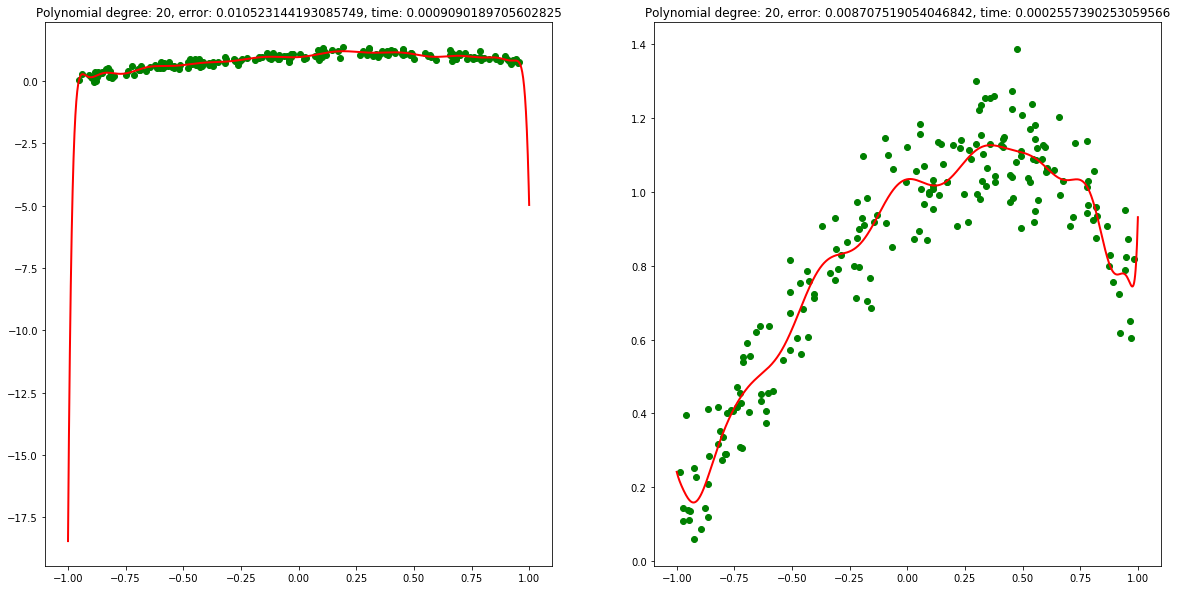

In [23]:
plt.figure(figsize=(20, 10))
plt.subplot(121)
plot_regression(x, y, 20)
plt.subplot(122)
plot_regression(x_new, y_new, 20)

## What happens if we have more data?

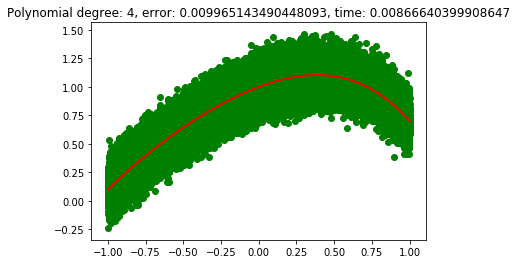

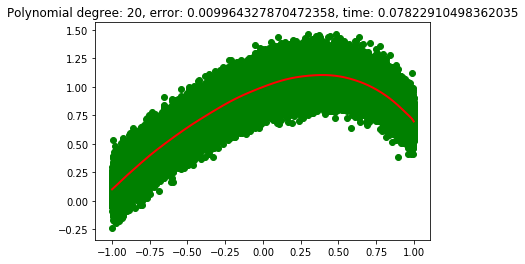

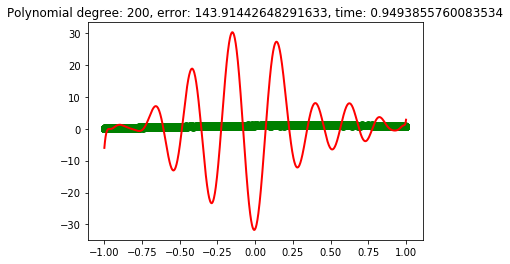

In [24]:
x_big, y_big = polynomial_data(coeffs, 100000)
plt.figure()
plot_regression(x_big, y_big, 4)
plt.figure()
plot_regression(x_big, y_big, 20)
plt.figure()
plot_regression(x_big, y_big, 200)

# Challenges with OLS / features / normal equations

### How to pick features?

### Sensitivity due to numerical instability / linear dependence